<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%BF%A1%EB%B6%81/09_%ED%8A%B9%EC%84%B1%EC%B6%94%EC%B6%9C%EC%9D%84%EC%82%AC%EC%9A%A9%ED%95%9C%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9 특성추출을 사용한 차원축소
- 특성이 지나치게 많은 경우, 모든 샘플에서 특성을 모으기 어려움
- 예측 품질을 높이려면 데이터의 능력을 조금 희생하더라도 특성의 수 축소 필요
- 이런 작업을 위한 특성추출 기법 학습

## 9.1 주성분을 사용하여 특성줄이기
- 일련의 특성이 주어졌을 때, 데이터의 분산은 유지하면서 특성의 수를 줄임
    - n_components 에 유지할 비율의 분산셋팅, whiten=True는 표준화 변환(평균0,분산1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digit = load_digits()
feature = StandardScaler().fit_transform(digit.data)
#99%의 분산을 유지하면서 PCA 클래스객체 생성
pca = PCA(n_components=0.99, whiten=True)
feature_pca = pca.fit_transform(feature)
print(f'원본특성개수:{feature.shape[1]}\nPCA특성개수:{feature_pca.shape[1]}')

원본특성개수:64
PCA특성개수:54


In [ ]:
feature.shape

(1797, 64)

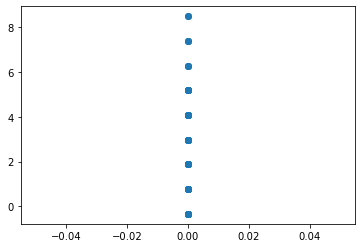

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(feature[:,0], feature[:,1]);

- 원본데이터의 첫번째, 두번째 특성은 유의미한 상관관계를 내포하지 못함

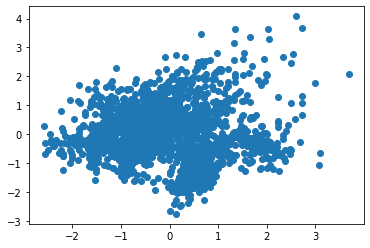

In [ ]:
plt.scatter(feature_pca[:,0], feature_pca[:,1]);

- PCA를 적용하여 특성을 표현함
    - 화이트닝을 적용하였기에 평균 0, 분산1로 스케일 (x,y)이 맞춰진 것 확인

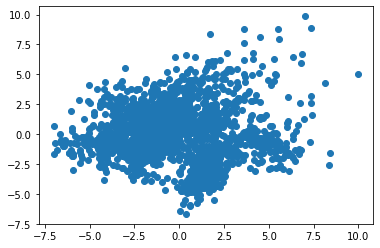

In [ ]:
pca = PCA(n_components=0.99)
feature_pca = pca.fit_transform(feature)
plt.scatter(feature_pca[:,0], feature_pca[:,1]);

- 화이트닝 미적용시 형태는 동일하나 스케일이 맞지않음
- pca로 찾은 주성분은 .components_속성에 저장되어있음
    - 각 주성분(54개의 주성분)은 원본특성공간에서 어떤 방향(기존 64개의 방향)을 내포

In [ ]:
pca.components_

array([[ 1.21482737e-18, -1.82233917e-01, -2.85867997e-01, ...,
        -1.03198001e-01, -1.19810604e-01, -7.14936163e-02],
       [-7.62433540e-19,  4.70270076e-02,  5.95647953e-02, ...,
        -2.42617777e-01, -1.65089262e-01, -7.13292370e-02],
       [-3.56880226e-18,  2.35882143e-02, -5.67987457e-02, ...,
        -2.22795243e-02,  1.00365586e-01,  9.24458865e-02],
       ...,
       [ 4.82989434e-18, -2.36573940e-02, -2.15711594e-02, ...,
         1.46857639e-02, -7.04598280e-02,  2.03743055e-02],
       [-4.23282686e-18, -1.59521850e-01, -2.79407118e-03, ...,
         1.02094964e-01,  1.00130796e-01, -9.54418079e-02],
       [ 7.46301185e-19, -2.03051327e-01, -7.68724457e-02, ...,
        -1.10157994e-01,  8.59937001e-02, -2.98885846e-02]])

In [ ]:
print(feature_pca.shape, pca.components_.shape)

(1797, 54) (54, 64)


- 특성행렬을 주성분에 투영하려면 components_배열을 전치하여 점곱하면 됨.
    - 넘파이allclose함수를 활용하여 위의 feature_pca배열과 동일한지 확인해보자

In [ ]:
import numpy as np
np.allclose(feature_pca, np.dot(feature,pca.components_.T))

True

- 적절한 분산 비율 선택을 위해, 전체주성분의 explained variance에서 분산의 양이 크게 늘어나지 않는 지점을 찾을 수 있음
    - 약 30개의 주성분으로도 80% 이상의 분산을 유지함을 확인

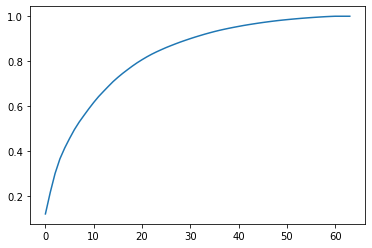

In [ ]:
pca = PCA(whiten=True).fit(feature)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

## 9.2 선형적으로 구분되지 않은 데이터의 차원 줄이기
- 비선형데이터에서도  커널트릭을 사용하는 주성분분석의 확장으로 차원 축소를 수행가능
    - 커널트릭은 비선형데이터를 선형적으로 구분되는 고차원으로 투영시키는 것을 의미
    - 설정 필요한 매개변수 많고 복잡, n_components 개수 직접지정 필요, gamma (특정개수의 역수 디폴트), degree (3차항 디폴트)등 하이퍼파라미터 설정필요
    - 주성분 얻을수 없음(.components_불가)
    
[참고:사이킷런kernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)<br>
[참고:세바스찬 라시카블로그](http://bit.ly/2HReP3f)

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

feature,_ = make_circles(n_samples=1000, random_state=1, noise=0.1,factor=0.1)
kpca = KernelPCA(kernel='rbf',gamma=15, n_components=1)
feature_kpca = kpca.fit_transform(feature)
print(f'원본특성개수:{feature.shape[1]}\nPCA특성개수:{feature_kpca.shape[1]}')

원본특성개수:2
PCA특성개수:1


## 9.3 클래스 분리를 최대화하여 특성 줄이기
- 선형판별분석(LDA)를 사용하여 클래스를 최대한 분리하는 성분축으로 특성을 투영
    - 분류모델에 사용될 특성 축소
    - 특성공간을 저차원공간으로 투영한다는 점에서는 PCA와 유사하지만 PCA는 분산이 최대성분축에만 관심이 있는 반면,
        - LDA는 클래스 간의 차이를 최대화 (분류/구분) 하는 목적을 가짐

In [ ]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = load_iris()
feature=iris.data
target=iris.target

lda =LinearDiscriminantAnalysis(n_components=1)
feature_lda = lda.fit(feature,target).transform(feature)

print(f'원본특성개수:{feature.shape[1]}\nLDA특성개수:{feature_lda.shape[1]}')

원본특성개수:4
LDA특성개수:1


In [ ]:
lda.explained_variance_ratio_

array([0.9912126])

하나의 성분이 99%의 분산을 설명함을 확인

## 9.4 행렬 분해를 사용하여 특성 줄이기(비음수행렬분해)
- 샘플과 특성 사이에 잠재된 관계를 표현하는 행렬로 특성을 분해
    - 즉 곱해서 원본행렬을 되게 만드는 여러개의 행렬로 나눠줌
    - 이름(Non-negative matrix Factorization)이 의미하듯 특성행렬은 음수를 포함할 수 없음
    - explained_variance를 제공하지 않음 > 최종모델에서 가장 좋은 결과를 내는 값을 찾아 여러값을 시도 필요

[참고:비음수 행렬분해](https://ko.wikipedia.org/wiki/%EC%9D%8C%EC%88%98_%EB%AF%B8%ED%8F%AC%ED%95%A8_%ED%96%89%EB%A0%AC_%EB%B6%84%ED%95%B4)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF
digit = load_digits()
feature=digit.data

nmf=NMF(n_components=10,random_state=1)
feature_nmf = nmf.fit_transform(feature)
print(f'원본특성개수:{feature.shape[1]}\nmf특성개수:{feature_nmf.shape[1]}')

원본특성개수:64
mf특성개수:10


C:\Dev\Miniconda\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
C:\Dev\Miniconda\lib\site-packages\sklearn\decomposition\_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
nmf.components_.shape

(10, 64)

In [ ]:
np.all(nmf.components_>=0) # 모든값 양수임 확인

True

In [ ]:
np.mean(feature -np.dot(feature_nmf,nmf.components_)) # 두행렬의 차이가 거의 없음 확인

-0.20062043744128064

## 9.5 희소한 데이터의 특성 줄이기
- TSVD를 사용하여 희소한 특성행렬의 차원을 축소함
    - PCA 와 비슷하며, 좀더 희소한 행렬에 사용가능

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.datasets import load_digits
import numpy as np

digit = load_digits()
feature=StandardScaler().fit_transform(digit.data)

feature_sparse = csr_matrix(feature)
tsvd= TruncatedSVD(n_components=10)
feature_sparse_tsvd = tsvd.fit(feature_sparse).transform(feature_sparse)

print(f'원본특성개수:{feature.shape[1]}\ntsvd특성개수:{feature_sparse_tsvd.shape[1]}')

원본특성개수:64
tsvd특성개수:10


In [ ]:
tsvd.explained_variance_ratio_[:3].sum()

0.3003938538504578